# Preliminary

## Import Library

In [ ]:
# import library yang diperlukan
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# mount drive
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


## Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dibimbing_DS/assignment/clustering/dataset/flight.csv')

df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

Dari hasil di atas, terdapat berapa kolom yang mengandung missing value, seperti `WORK_CITY`, 'WORK_PROVINCE', dan lain sebagainya

## Data Definition

| Feature/Variable | Description |
|---|---|
| MEMBER_NO-b | ID Member |
| FFP_DATE | Frequent Flyer Program Join Date |
| FIRST_FLIGHT_DATE | Tanggal Penerbangan pertama (First Flight Date) |
| GENDER | Jenis Kelamin (Gender) |
| FFP_TIER | Tier dari Frequent Flyer Program (Frequent Flyer Program Tier) |
| WORK_CITY | Kota Asal (Work City) |
| WORK_PROVINCE | Provinsi Asal (Work Province) |
| WORK_COUNTRY | Negara Asal (Work Country) |
| AGE | Umur Customer (Customer Age) |
| LOAD_TIME | Tanggal data diambil (Data Load Time) |
| FLIGHT_COUNT | Jumlah penerbangan Customer (Customer Flight Count) |
| BP_SUM | Rencana Perjalanan (Trip Plan) |
| SUM_YR_1 | Total credit/point di tahun pertama (Total credit/points in first year) |
| SUM_YR_2 | Total credit/point di tahun kedua (Total credit/points in second year) |
| SEG_KM_SUM | Total jarak(km) penerbangan yg dilakukan (Total distance (km) flown) |
| LAST_FLIGHT_DATE | Tanggal penerbangan terakhir (Last Flight Date) |
| LAST_TO_END | Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir (Time from last flight to latest flight booking) |
| AVG_INTERVAL | Rata-rata jarak waktu (Average interval) |
| MAX_INTERVAL | Maksimal jarak waktu (Maximum interval) |
| EXCHANGE_COUNT | Jumlah penukaran (Number of exchanges) |
| avg_discount | Rata-rata rata discount yang didapat customer (Average discount received by customer) |
| Points_Sum | Jumlah poin yang didapat customer (Total points received by customer) |
| Point_NotFlight | point yang tidak digunakan oleh members (Points not used by members) |

In [ ]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


# Data Preporcessing

## Lowercase to all columns

In [ ]:
# lowercase all column names
df.columns = df.columns.str.lower()

In [ ]:
# check the result
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62988 non-null  int64  
 1   ffp_date           62988 non-null  object 
 2   first_flight_date  62988 non-null  object 
 3   gender             62985 non-null  object 
 4   ffp_tier           62988 non-null  int64  
 5   work_city          60719 non-null  object 
 6   work_province      59740 non-null  object 
 7   work_country       62962 non-null  object 
 8   age                62568 non-null  float64
 9   load_time          62988 non-null  object 
 10  flight_count       62988 non-null  int64  
 11  bp_sum             62988 non-null  int64  
 12  sum_yr_1           62437 non-null  float64
 13  sum_yr_2           62850 non-null  float64
 14  seg_km_sum         62988 non-null  int64  
 15  last_flight_date   62988 non-null  object 
 16  last_to_end        629

## Check Duplicates

In [ ]:
# if the result is 1, then there is no duplicates
len(df.drop_duplicates()) / len(df)

1.0

In [ ]:
# check in ID member
len(df['member_no'].drop_duplicates()) / len(df)

1.0

Hasil ini memberikan pemahaman awal bahwa tidak ada member berdasarkan `id_member` yang tercatat dua kali dalam penerbangan atau fitur ini juga unique. Dalam metode yang akan digunakan, mengetahui fitur ini unik atau tidak menjadi penting agar meamstikan setiap baris mewakili satu pelanggan yang berbeda

## Missing Value

In [ ]:
# check percentage of missing
df.isnull().sum() / df.shape[0] * 100

,0
member_no,0.000000
ffp_date,0.000000
first_flight_date,0.000000
gender,0.004763
ffp_tier,0.000000
work_city,3.602273
work_province,5.156538
work_country,0.041278
age,0.666794
load_time,0.000000


Berdasarkan hasil ini hampir semua kolom yang missing niali tidak ada yang mencapai 20%. Paling tinggi hanya ada di kolom `work_prince` dengan persentase total nilai yang hilang sebanyak 5%.

Maka dari itu, imputasi dengan suatu nilai akan dipilih dibandingkan menghapus fitur. Walaupun di kemudian, fitur yang diimputasi bisa saja tidak dipilih dalam pemodelan clustering.

Sebelum imputasi saya akan mengecek, informasi data yang missing, dtype dan nilai unique di fitur-fitur yang terdapat missing value

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df[df[['sum_yr_1', 'sum_yr_2']].isnull().any(axis=1)]

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,flight_count,bp_sum,sum_yr_1,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
5595,53807,6/20/2008,6/20/2008,Male,4,changchun,jilin,CN,55.0,3/31/2014,23,29973,NaN,0.0,38933,2/26/2013,400,14.227273,37,10,0.821863,29973,10
6605,43887,8/6/2010,8/15/2010,Female,4,shanghai,shanghai,CN,31.0,3/31/2014,38,24068,NaN,0.0,39632,3/16/2013,382,9.378378,36,1,0.728828,24068,3
10196,24497,4/3/2012,4/3/2012,Male,4,lishuishi,zhejiangsheng,CN,32.0,3/31/2014,15,17797,NaN,0.0,26850,12/28/2012,460,19.214286,40,1,0.806667,17797,1
16897,34788,11/20/2010,2/22/2011,Female,4,shanghai,shanghai,CN,37.0,3/31/2014,20,10734,NaN,0.0,20918,2/8/2013,418,15.473684,52,1,0.687114,14030,23
18177,56998,11/1/2007,1/12/2008,Male,4,shanghai,shanghai,CN,65.0,3/31/2014,8,11310,NaN,0.0,11976,10/28/2012,521,28.142857,111,1,1.125000,11310,1
23994,50298,4/15/2011,4/15/2011,Female,4,shanghai,shanghai,CN,33.0,3/31/2014,10,8718,NaN,0.0,13740,9/22/2012,557,12.444444,54,0,0.730000,8718,1
27915,40961,1/20/2011,1/20/2011,Female,4,shenzhen,guangdong,CN,30.0,3/31/2014,6,7266,NaN,0.0,8244,11/22/2012,496,44.800000,98,1,1.000000,7266,1
28820,24508,3/27/2012,3/27/2012,Male,4,haiyan,zhejiang,CN,37.0,3/31/2014,11,6406,NaN,0.0,11442,12/27/2012,461,26.600000,67,0,0.690815,6406,0
29671,39966,1/1/2009,1/28/2009,Male,4,shenyang,liaoning,CN,52.0,3/31/2014,6,5238,0.0,NaN,10155,11/15/2013,138,7.600000,18,0,0.748599,5238,0
29704,34938,7/28/2012,8/2/2012,Male,4,shenyangshi,liaoningsheng,CN,50.0,3/31/2014,7,6919,NaN,0.0,9485,11/26/2012,492,19.333333,42,0,0.800000,6919,0


In [ ]:
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

# define col to check
cols_to_check = ['gender', 'work_city', 'work_province', 'work_country', 'age', 'sum_yr_1', 'sum_yr_2']

print(df[cols_to_check].info(), '\n')

for col in cols_to_check:
  print(f'---------Total unique in {col}-----------')
  display(df[col].value_counts())
  print('')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         62985 non-null  object 
 1   work_city      60719 non-null  object 
 2   work_province  59740 non-null  object 
 3   work_country   62962 non-null  object 
 4   age            62568 non-null  float64
 5   sum_yr_1       62437 non-null  float64
 6   sum_yr_2       62850 non-null  float64
dtypes: float64(3), object(4)
memory usage: 3.4+ MB
None 

---------Total unique in gender-----------


,count
gender,
Male,48134
Female,14851



---------Total unique in work_city-----------


,count
work_city,
guangzhou,9386
beijing,7845
shanghai,5001
shenzhen,3605
dalian,1979
...,...
MIZUMA-GUN,1
helan,1
PJ,1



---------Total unique in work_province-----------


,count
work_province,
guangdong,17509
beijing,8014
shanghai,4998
liaoning,4182
xinjiang,2512
...,...
SAN JOSE,1
GUANGZHOU,1
Naples,1



---------Total unique in work_country-----------


,count
work_country,
CN,57748
HK,991
JP,875
KR,790
US,575
...,...
cn,1
IA,1
BG,1



---------Total unique in age-----------


,count
age,
47.0,2727
38.0,2713
37.0,2683
42.0,2622
39.0,2595
...,...
7.0,1
6.0,1
87.0,1



---------Total unique in sum_yr_1-----------


,count
sum_yr_1,
0.0,9915
960.0,174
690.0,151
700.0,143
1024.0,136
...,...
120500.0,1
112364.0,1
124560.0,1



---------Total unique in sum_yr_2-----------


,count
sum_yr_2,
0.0,11812
883.0,76
644.0,66
986.0,62
1000.0,60
...,...
102594.0,1
247.0,1
307.0,1


Untuk data `sum_yr_1` dan `sum_yr_2`, ini merupkan total credit/point di tahun pertama dan total credit/point pertama di tahun kedua. Dalam baris NaN yang dihasilkan, kolom ini memungkinkan bernilai 0 atau nilai minimumnya adalah 0. Memberikan sebuah nilai credit/point kepada pelanggan yang sebenarnya mungkin tidak memiliki transaksi apa pun di tahun tersebut memiliki risiko yang besar dalam merubah segmentation sehingga mengisi 0 lebih mungkin mencerminkan karena dari datanya juga memungkinkan diisi dengan 0 yang menandakan tidak ada credit/point yang dihasilkan.

Maka dari itu, dibandingkan dengan mengisisi denga nilai median, saya lebih memilih mengisinya dengan 0. Sementara itu untuk `age`, nilai minimumnya adalah 6. Jadi, age akan diisi dengan median agar lebih aman jika terdapat skewness di dalam distribusinya.

Adapun, untuk kolom kategorik seperti 'gender', 'work_city', 'work_province', 'work_country', saya akan isi dengan nilai modusnya

In [ ]:
# # fill with 0
df['sum_yr_1'] = df['sum_yr_1'].fillna(0)
df['sum_yr_2'] = df['sum_yr_2'].fillna(0)

# # fill with median
median_age = df['age'].median()
df['age'] = df['age'].fillna(median_age)

# # fill with modus
df['gender'] = df['gender'].fillna(df['gender'].mode()[0]) # 0 would be pick the first appear
df['work_city'] = df['work_city'].fillna(df['work_city'].mode()[0])
df['work_province'] = df['work_province'].fillna(df['work_province'].mode()[0])
df['work_country'] = df['work_country'].fillna(df['work_country'].mode()[0])

In [ ]:
# checkpoint
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          62988 non-null  int64  
 1   ffp_date           62988 non-null  object 
 2   first_flight_date  62988 non-null  object 
 3   gender             62988 non-null  object 
 4   ffp_tier           62988 non-null  int64  
 5   work_city          62988 non-null  object 
 6   work_province      62988 non-null  object 
 7   work_country       62988 non-null  object 
 8   age                62988 non-null  float64
 9   load_time          62988 non-null  object 
 10  flight_count       62988 non-null  int64  
 11  bp_sum             62988 non-null  int64  
 12  sum_yr_1           62988 non-null  float64
 13  sum_yr_2           62988 non-null  float64
 14  seg_km_sum         62988 non-null  int64  
 15  last_flight_date   62988 non-null  object 
 16  last_to_end        629

# EDA

## Statistic Descriptive

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
member_no,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
ffp_tier,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
age,62988.0,42.466502,9.853632,6.0,35.000000,41.000000,48.000000,110.0
flight_count,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
bp_sum,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
sum_yr_1,62988.0,5308.528851,8089.288586,0.0,960.000000,2754.000000,6524.250000,239560.0
sum_yr_2,62988.0,5591.748190,8697.772426,0.0,768.000000,2761.500000,6826.250000,234188.0
seg_km_sum,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
last_to_end,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
avg_interval,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


In [ ]:
df.describe(include='object').T

,count,unique,top,freq
ffp_date,62988,3068,1/13/2011,184
first_flight_date,62988,3406,2/16/2013,96
gender,62988,2,Male,48137
work_city,62988,3234,guangzhou,11655
work_province,62988,1165,guangdong,20757
work_country,62988,118,CN,57774
load_time,62988,1,3/31/2014,62988
last_flight_date,62988,731,3/31/2014,959


Berdasarkan hasil di atas, ditemukan bahwa:
* informasi dan nilai yang diberikan cukup masuk akal. Dalam arti tidak ada nilai yang tidak mungkin dihasilkan, misalnya dalam `flight_count` yang berisikan informasi jumlah penerbangan customer nilai minimumnya di atas > 0 atau tidak ada nilai negatif di sana.
* Beberapa fitur memiliki gap yang tidak begitu jauh antara mean dan mediannya, seoerti age, average discount, dsb.
* Namun untuk fitur `avg_disccount`, secara bisnis jika diskon bernolai 1 berarti 100% atau mendapatkan layanan gratis, sementara jika lebih dari 1 berarti maskapai juga ikut membayar yang mana ini mungkin sedikit tidak masuk akal jika dikaitkan dalam konteks bisnis. Hal yang perlu digarisbawahi mungkin bisa saja ini terjadi karena kurang konteks dalam pengumpulan data, bagaimana data direpresentasikan dan lain sebagainya

Terdapat beberapa detail yang perlu dicek lebih lanjut, seperti fitur `age` dan `avg_discount`

Nilai max umur 110 perlu dicuragai untuk memastikan berapa banyak konsumen dengan umur ini.

In [ ]:
# check age more than 100
len(df[df['age'] > 100])

1

Karena hasilnya cuman 1 dan secara biologis mungkin tercapai, maka tidak dihapus. Namun, hal yang perlu dicek lagi juga terletak di avg_discount di mana nilai maksimal adalah 1.5.

In [ ]:
# check averege discount more than 1
len(df[df['avg_discount'] > 1])

2947

In [ ]:
df[df['avg_discount'] > 1]

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
1,28065,2/19/2007,8/3/2007,Male,6,guangzhou,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
13,54943,10/25/2006,10/27/2007,Male,6,shenzhen,guangdong,CN,47.0,3/31/2014,...,119832.0,179514,3/29/2014,3,6.196581,38,14,1.398382,270704,20
15,1254,3/28/2008,4/5/2008,Male,4,BOWLAND HEIGHTS,CALIFORNIA,US,63.0,3/31/2014,...,54764.0,234721,1/27/2014,65,31.190476,102,6,1.026085,310002,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60394,47454,11/22/2005,4/25/2006,Female,4,LOWELL,MA,US,49.0,3/31/2014,...,0.0,1161,10/28/2012,521,62.000000,182,0,1.023945,2300,0
61606,51953,8/9/2012,8/9/2012,Male,4,RIYADH,SAUDIA,LA,51.0,3/31/2014,...,0.0,822,8/10/2012,600,0.500000,1,0,1.165693,1650,0
61792,35494,3/5/2009,3/4/2010,Male,4,beijing,beijing,CN,58.0,3/31/2014,...,0.0,728,7/17/2012,624,3.000000,3,0,1.250000,1250,0
62168,46131,3/1/2007,5/19/2007,Male,4,guangzhou,guangdong,TW,39.0,3/31/2014,...,1292.0,751,6/5/2013,301,4.000000,4,0,1.089747,869,0


Dari hasil maka nilai yang lebih dari 1, saya asumsikan mungkin sebagai kesalahan atau tidak sesuai logic bisnis atau secara matematis. Maka dari itu, baris pada fitur `avg_discount` yang lebih dari 1 akan saya hapus

In [ ]:
# filter in column avg_discount
df = df[df['avg_discount'] <= 1]

In [ ]:
# check again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60041 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          60041 non-null  int64  
 1   ffp_date           60041 non-null  object 
 2   first_flight_date  60041 non-null  object 
 3   gender             60041 non-null  object 
 4   ffp_tier           60041 non-null  int64  
 5   work_city          60041 non-null  object 
 6   work_province      60041 non-null  object 
 7   work_country       60041 non-null  object 
 8   age                60041 non-null  float64
 9   load_time          60041 non-null  object 
 10  flight_count       60041 non-null  int64  
 11  bp_sum             60041 non-null  int64  
 12  sum_yr_1           60041 non-null  float64
 13  sum_yr_2           60041 non-null  float64
 14  seg_km_sum         60041 non-null  int64  
 15  last_flight_date   60041 non-null  object 
 16  last_to_end        60041 no

## Data Distribution by Boxplot

In [ ]:
# check the FFP_TIER atau loyalty program from the airline
df['ffp_tier'].value_counts()

,count
ffp_tier,
4,56118
5,2939
6,984


Nilai 4, 5, dan 6 mereprentasikan perbedaan level dari status loyalti. Semakin tinggi nilai berarti semakin banyak point atau miles yang dihasilkan dari jumlah penerbangan yang semakin banyak.

In [ ]:
# creat function
def plot_multiple_boxplots(df, list_of_variables, n_cols=3, hue=None):
    # defense the features ara there
    n_plots = len(list_of_variables)
    if n_plots == 0:
        print("Variable list is empty, nothing to plot.")
        return

    # count rows to plot
    n_rows = math.ceil(n_plots / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 5))
    axes = axes.flatten()

    for i, var in enumerate(list_of_variables):
        ax = axes[i]
        # Check if the variable is suitable for hue
        if hue and hue in df.columns:
            # If hue is provided, plot boxplot with hue
            sns.boxplot(y=df[var], x=df[hue], ax=ax)
            ax.set_title(f'Boxplot of {var} by {hue}')
            ax.set_xlabel(hue) # Set x-label to hue variable
        else:
            # Otherwise, plot without hue
            sns.boxplot(y=df[var], ax=ax)
            ax.set_title(f'Boxplot of {var}')
            ax.set_xlabel('') # Remove default x-label when no hue is used or hue not found
        ax.set_ylabel(var)

    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

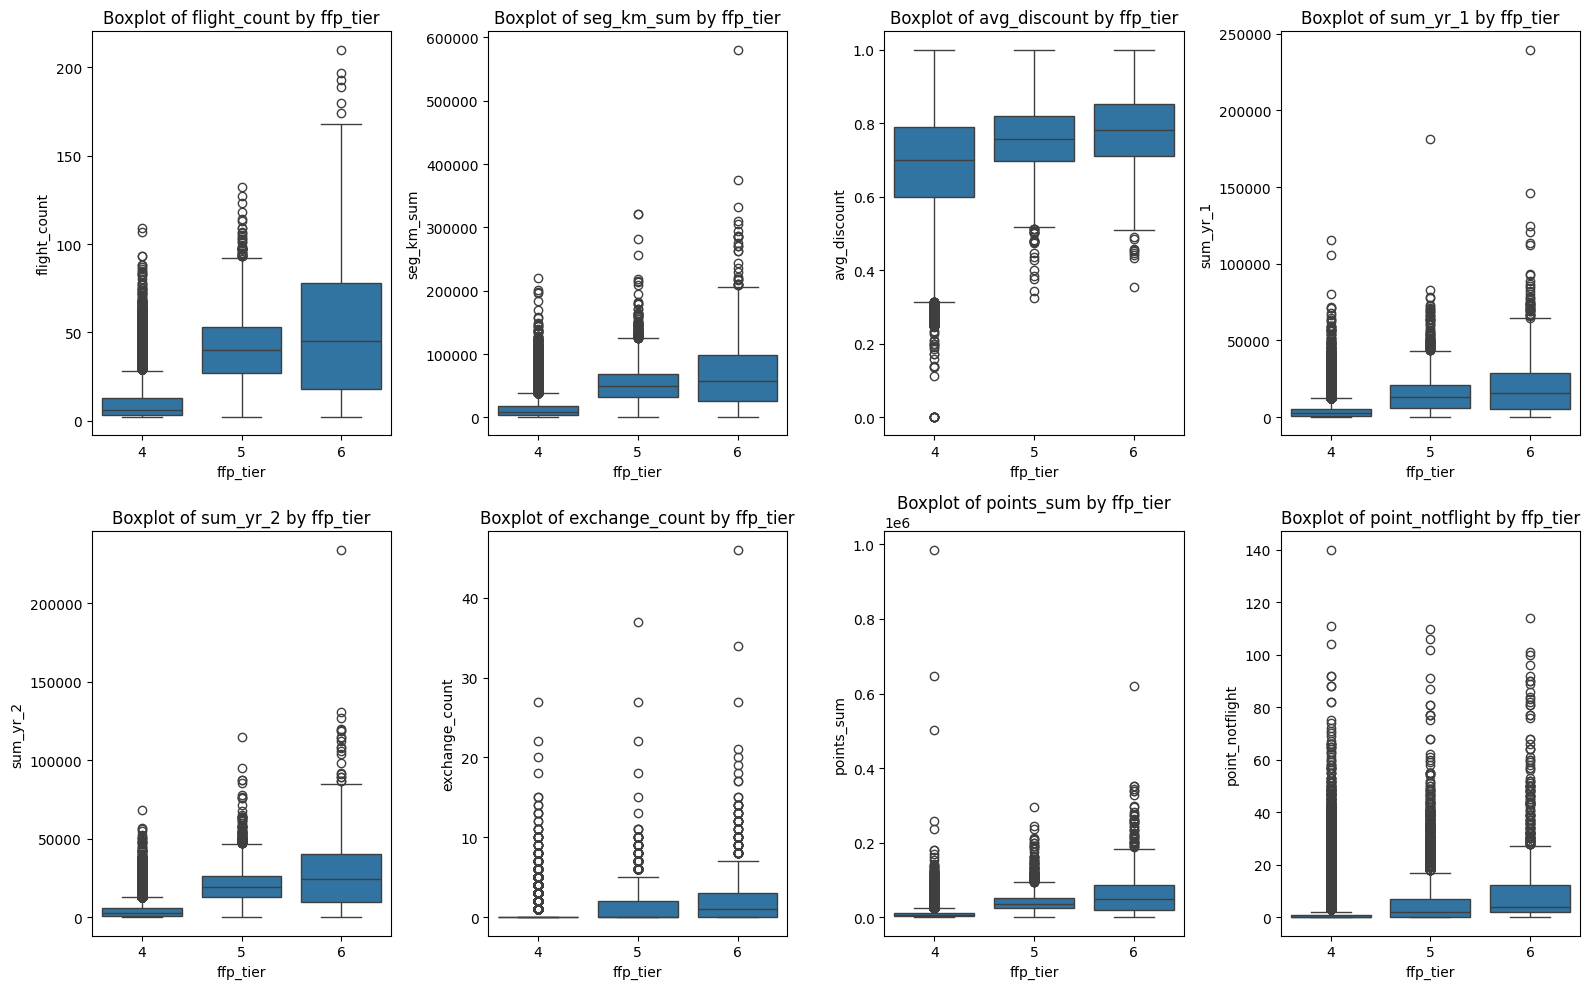

In [ ]:
# define column to check
columns_to_plot = ['flight_count', 'seg_km_sum', 'avg_discount', 'sum_yr_1', 'sum_yr_2', 'exchange_count', 'points_sum', 'point_notflight']

# call the function to visualize boxplot
plot_multiple_boxplots(df,
                       columns_to_plot,
                       n_cols=4,
                       hue='ffp_tier')

* Hasil di ata membuktikan ffp_tier=6 akan relatif memiliki median yang relatif lebih tinggi
* Tier yang semakin tinggi maka nilai atau jumlah yang didapat di fitur-fitur juga akan tinggi, maka sudah diprediksi bahwa akan banyak nilai outlier di sini karena memang menggambarkan bagaimana kebiasaan dengan member tier tinggi dengan member yang tier rendah.
* Ini membuktikan bahwa pelanggan dengan tier loyalitas tertinggi (Tier 6) memang memiliki kebiasaan penerbangan yang lebih aktif (lebih banyak penerbangan, jarak tempuh lebih jauh, lebih banyak poin/kredit yang terkumpul, lebih banyak penukaran).

Untuk nilai outlier yang lainnya sementara belum dihapus kecuali memang dibutuhkan setelah proses feature selection di tahap data manipulation/data engineering berdasarkan model LRFMC. Hal ini menjadi catatan dalam peneparan scaling, jika outlier terlalu besar, maka scaling daengan standarize karena lebih tahan terhadap outlier dibandingkan Normalize/MinMaxScaler

## Matrix Correlation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60041 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          60041 non-null  int64  
 1   ffp_date           60041 non-null  object 
 2   first_flight_date  60041 non-null  object 
 3   gender             60041 non-null  object 
 4   ffp_tier           60041 non-null  int64  
 5   work_city          60041 non-null  object 
 6   work_province      60041 non-null  object 
 7   work_country       60041 non-null  object 
 8   age                60041 non-null  float64
 9   load_time          60041 non-null  object 
 10  flight_count       60041 non-null  int64  
 11  bp_sum             60041 non-null  int64  
 12  sum_yr_1           60041 non-null  float64
 13  sum_yr_2           60041 non-null  float64
 14  seg_km_sum         60041 non-null  int64  
 15  last_flight_date   60041 non-null  object 
 16  last_to_end        60041 no

<Axes: >

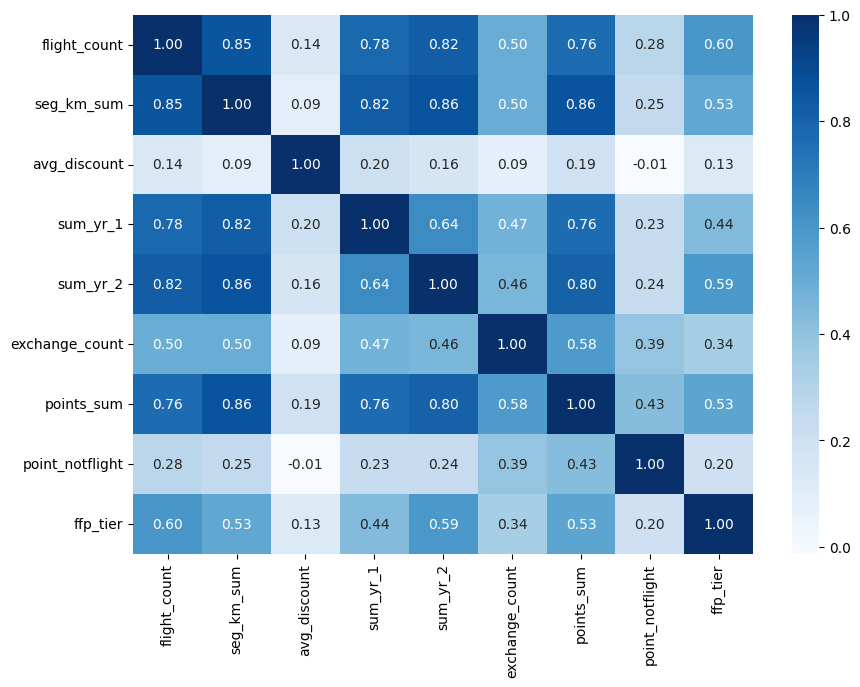

In [ ]:
# define col/features
columns_to_plot = ['flight_count', 'seg_km_sum', 'avg_discount', 'sum_yr_1', 'sum_yr_2', 'exchange_count', 'points_sum', 'point_notflight', 'ffp_tier']

# calculate correlation each feature
corr = df[columns_to_plot].corr()

# visualize
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues')

Hubungan korelasi dengan clusteirng
* Jika dua fitur berkorelasi tinggi, maka informasi yang diberikan mirip atau redundant. Maka dari itu, jika hal tersebut terjadi, mempertahankan salah satu fitur atau mengurangi dimensi mungkin perlu dijadikan opsi sebelum melakukan clustering
* Berdasarkan hasil `seg_km`, dan `flight_count` memiliki korelasi 0.85 yang mana memang berdasarkan definis, kolom `seg_km` menggambarkan total jarak penerbangan yang sudah dilakukan oleh konsumen, seementara itu `flight_count` yang berarti jumlah penrbangan konsumen. Dari definisi, sudah bisa dilihat bahwa hubungannya cenderung lurus, artinya semakin banyak penerbangan yang dilakukan, maka semakin besar total jarak penerbangan yang sudah dilakukan
* Demikian dengan kolom yang lainnya yang memiliki korelasi tinggi, **kemungkinan besar** memiliki informasi atau definisi yang mirip atau berhubungan.  

Tidak semua fitur akan digunakan dalam clustering. Demikian dalam analisis ini, terdapat model yang akan digunakan, yakni LRFMC model. Model ini diadopsi dari penelitian Wu (2022) yang mendefinisikan:
* L: Interval antara tanggal bergabung dan waktu saat ini (tanggal data diambil) / panjang keanggotaan pelanggan
* R: Interval konsumsi dari tanggal konsumen terakhir (penerbangan paling akhir)
* F: Frekuensi konsumsi atau dalam konteksi adalah jumlah penerbangan yang dilakukan
* M: Total *miles* penerbangan dalam waktu yang diobservasi
* C: Rata-rata diskon kabin dalam waktu yang diobservasi

link: https://www.ijser.in/archives/v10i5/SE22525122734.pdf#:~:text=In%20this%20paper%2C%20based%20on%20the%20traditional%20LRFMC,strategies%20for%20different%20types%20of%20customers.%201.%20Introduction

# Data Manipulation or Feature Engineering

In [ ]:
df.head(10)

,member_no,ffp_date,first_flight_date,gender,ffp_tier,work_city,work_province,work_country,age,load_time,...,sum_yr_2,seg_km_sum,last_flight_date,last_to_end,avg_interval,max_interval,exchange_count,avg_discount,points_sum,point_notflight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
5,56972,2/10/2008,9/29/2009,Male,6,guangzhou,guangdong,CN,64.0,3/31/2014,...,76946.0,294585,1/13/2014,79,7.043956,52,10,0.967692,343121,15
6,44924,3/22/2006,3/29/2006,Male,6,wulumuqishi,xinjiang,CN,46.0,3/31/2014,...,114469.0,287042,3/31/2014,1,7.190000,28,20,0.965347,298873,29
7,22631,4/9/2010,4/9/2010,Female,6,wenzhoushi,zhejiang,CN,50.0,3/31/2014,...,114971.0,287230,3/29/2014,3,10.111111,45,7,0.962070,351198,14
8,32197,6/7/2011,7/1/2011,Male,5,DRANCY,guangdong,FR,50.0,3/31/2014,...,87401.0,321489,3/26/2014,6,13.054545,94,5,0.828478,295158,7
9,31645,7/5/2010,7/5/2010,Female,6,wenzhou,zhejiang,CN,43.0,3/31/2014,...,60267.0,375074,3/17/2014,15,11.333333,73,13,0.708010,251907,16
10,58877,11/18/2010,11/20/2010,Female,6,PARIS,PARIS,FR,34.0,3/31/2014,...,91581.0,262013,3/10/2014,22,16.833333,95,1,0.988658,337839,3
11,37994,11/13/2004,12/2/2004,Male,6,beijing,.,CN,47.0,3/31/2014,...,126821.0,271438,3/26/2014,6,5.027778,42,15,0.952535,353101,66
12,28012,11/23/2006,11/18/2007,Male,5,SAN MARINO,CA,US,58.0,3/31/2014,...,53977.0,321529,1/25/2014,67,23.000000,112,3,0.799127,245808,4


In [ ]:
df['load_time'].value_counts()

,count
load_time,
3/31/2014,60041


perhatikan di baris ke-2 (start index=0) kolom `last_to_end` memiliki nilai 11. Jika kita telaah lebih lanjut jarak waktu (dalam hari) antara `last_flight_date` ke `load_time` jumlahnya akan 11 hari yang artinay sama dengan data yang diberikan.

Maka dari itu untuk menghitung **Recency/R**, kita hanya perlu mnggunakan kolom `last_to_end`

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60041 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   member_no          60041 non-null  int64  
 1   ffp_date           60041 non-null  object 
 2   first_flight_date  60041 non-null  object 
 3   gender             60041 non-null  object 
 4   ffp_tier           60041 non-null  int64  
 5   work_city          60041 non-null  object 
 6   work_province      60041 non-null  object 
 7   work_country       60041 non-null  object 
 8   age                60041 non-null  float64
 9   load_time          60041 non-null  object 
 10  flight_count       60041 non-null  int64  
 11  bp_sum             60041 non-null  int64  
 12  sum_yr_1           60041 non-null  float64
 13  sum_yr_2           60041 non-null  float64
 14  seg_km_sum         60041 non-null  int64  
 15  last_flight_date   60041 non-null  object 
 16  last_to_end        60041 no

## Feature Selection

Berdasarkan kolom di atas model LRFMC dapat diwakilkan oleh fitur
 * `load_time` - `ffp_date`: menggambarkan "L" karena berisikan informasi mengenai interval keanggotaan pelanggan
 * 'last_to_end': menggambarkan "R" karena berisikan informasi jarak waktu penerbangan terakhirr ke pesananan penerbangan terakhir.
 * `flight_count`: menggambarkan "F" karena berisikan informasi total/jumlah penerbangan customer
 * `seg_km_sum`: mennggambarkan "M" karena fitur tersebut berisikan total jarak(km) penerbangan yang sudah dilakukan. Semakin besar nilainya, maka semakin besar pula uang yang dikeluarkan/dihabiskan karena seberapa jauh miles, uang yang dikeluarkan juga akan tidak sedikit (besar)
 * `avg_discount`: menggambarkan "C" karena fitur ini memberikan informasi rata-rata discount yang didapatkan customer

In [ ]:
# change dtype for feature `load_time` and `ffp_date`
df['ffp_date'] = pd.to_datetime(df['ffp_date'])
df['load_time'] = pd.to_datetime(df['load_time'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60041 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   member_no          60041 non-null  int64         
 1   ffp_date           60041 non-null  datetime64[ns]
 2   first_flight_date  60041 non-null  object        
 3   gender             60041 non-null  object        
 4   ffp_tier           60041 non-null  int64         
 5   work_city          60041 non-null  object        
 6   work_province      60041 non-null  object        
 7   work_country       60041 non-null  object        
 8   age                60041 non-null  float64       
 9   load_time          60041 non-null  datetime64[ns]
 10  flight_count       60041 non-null  int64         
 11  bp_sum             60041 non-null  int64         
 12  sum_yr_1           60041 non-null  float64       
 13  sum_yr_2           60041 non-null  float64       
 14  seg_km_sum 

In [ ]:
# check unique in "member_no"
df['member_no'].nunique()

60041

In [ ]:
len(df)

60041

Dari hasil ini jika akan menghitung numerik, seperti total penerbangan, rentang hari dari penerbangan terakhir, atau rata-rata diskon menggunakan `sum` ataupun `average` tidak akan mempengaruhi hasil groupby. Hal ini karena total unique di fitur `member_no` = total baris secara keseluruhan. Justru akan salah jika menggunakan agregasi `count` atua `nunique` karena kolom2 tersebut sudah berisikan informasi jumlah perhitungan atau sebuah nilai untuk masing-masing member.

Menggunakan `count` atau `unique` akan menghitung total baris atau total uniquenya sehingga ini tidak representatif terhadap model. Sementara itu, agregasi (sum, avg) berdasarkan group `member_no` tidak akan memberikan efek2 apa2 sehingga memilih fitur lebih efisien digunakan, seperti berikut:

In [ ]:
# calculate (days) lenght of membership
df['Length_of_Membership'] = (df['load_time'] - df['ffp_date']).dt.days

# feature selection for LRFMC model
LRFMC_model = df[['member_no', 'Length_of_Membership', 'last_to_end', 'flight_count', 'seg_km_sum', 'avg_discount']].copy()

# rename columns
LRFMC_model.columns = ['member_no', 'Length', 'Recency', 'Frequency', 'Monetary', 'Discount_coefficient']

In [ ]:
LRFMC_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60041 entries, 0 to 62987
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   member_no             60041 non-null  int64  
 1   Length                60041 non-null  int64  
 2   Recency               60041 non-null  int64  
 3   Frequency             60041 non-null  int64  
 4   Monetary              60041 non-null  int64  
 5   Discount_coefficient  60041 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 3.2 MB


In [ ]:
LRFMC_model.head()

,member_no,Length,Recency,Frequency,Monetary,Discount_coefficient
0,54993,2706,1,210,580717,0.961639
4,39546,1816,5,152,309928,0.970658
5,56972,2241,79,92,294585,0.967692
6,44924,2931,1,101,287042,0.965347
7,22631,1452,3,73,287230,0.962070


## Check Distribution Again

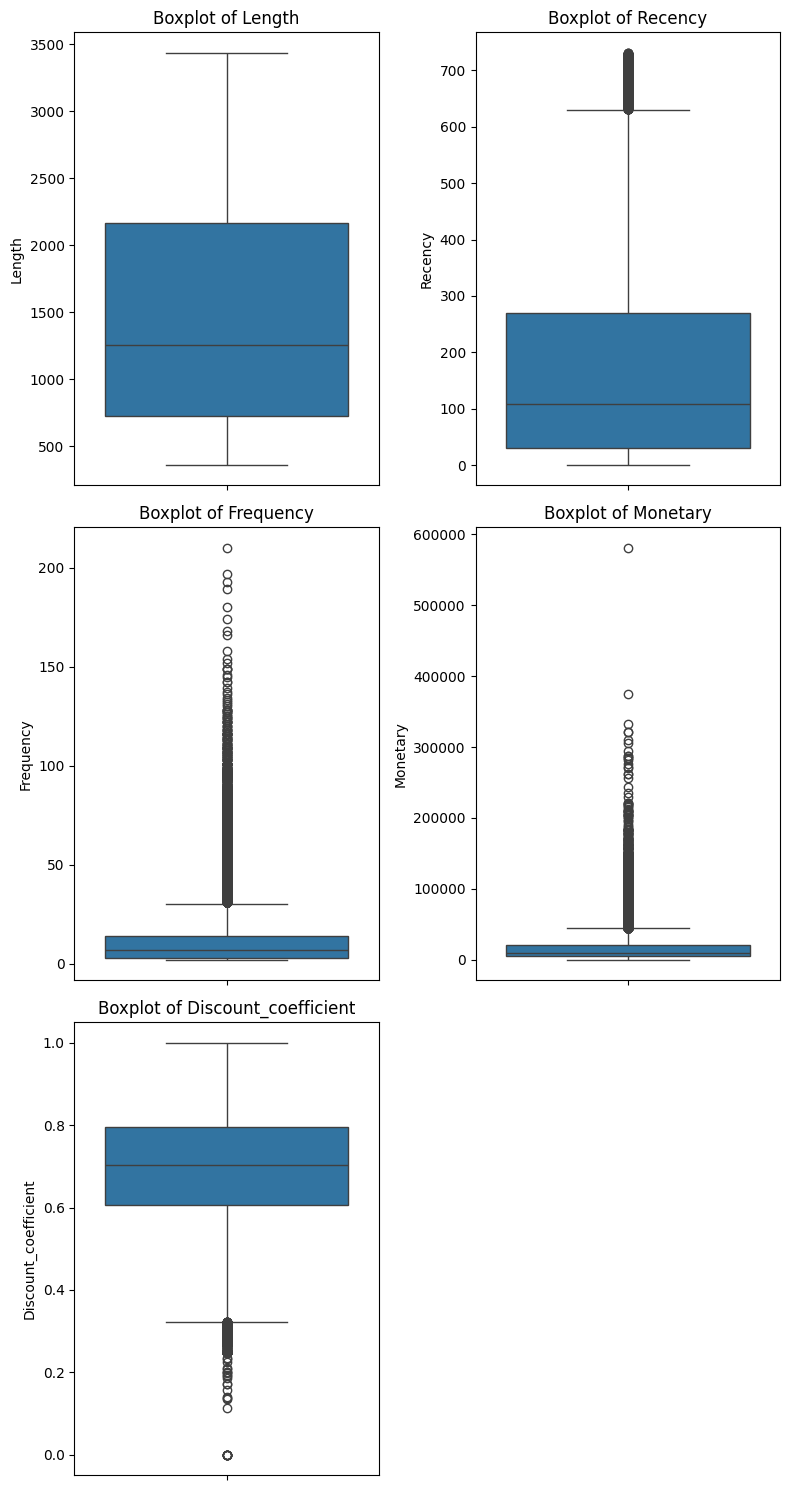

In [ ]:
cols_to_check = ['Length', 'Recency', 'Frequency', 'Monetary', 'Discount_coefficient']

plot_multiple_boxplots(LRFMC_model,
                       cols_to_check,
                       n_cols=2)

In [ ]:
def calculate_outliers_iqr(df, column):

  # calculate IQR
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)

  # Count outliers
  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  num_outliers = len(outliers)

  # Calculate percentage
  total_rows = len(df)
  percentage_outliers = (num_outliers / total_rows) * 100 if total_rows > 0 else 0.0

  return num_outliers, percentage_outliers

In [ ]:
# check the total and the percentage of outlier
for col in cols_to_check:
    num_out, pct_out = calculate_outliers_iqr(LRFMC_model, col)
    print(f"Column '{col}': {num_out} outliers ({pct_out:.2f}%)")

Column 'Length': 0 outliers (0.00%)
Column 'Recency': 1678 outliers (2.79%)
Column 'Frequency': 4735 outliers (7.89%)
Column 'Monetary': 4535 outliers (7.55%)
Column 'Discount_coefficient': 499 outliers (0.83%)


In [ ]:
LRFMC_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60041 entries, 0 to 62987
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   member_no             60041 non-null  int64  
 1   Length                60041 non-null  int64  
 2   Recency               60041 non-null  int64  
 3   Frequency             60041 non-null  int64  
 4   Monetary              60041 non-null  int64  
 5   Discount_coefficient  60041 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 3.2 MB


In [ ]:
# define column and list tot store index that contain outlier
LRFMC_model_copy = LRFMC_model.copy()
cols_to_check = ['Length', 'Recency', 'Frequency', 'Monetary', 'Discount_coefficient']

all_outlier_indices = set()

# calculate outlier with IQR
for col in cols_to_check:
  Q1 = LRFMC_model_copy[col].quantile(0.25)
  Q3 = LRFMC_model_copy[col].quantile(0.75)

  IQR = Q3 - Q1
  lower_bound = Q1 - (1.5 * IQR)
  upper_bound = Q3 + (1.5 * IQR)

  outliers_in_current_col = LRFMC_model_copy[
        (LRFMC_model_copy[col] < lower_bound) | (LRFMC_model_copy[col] > upper_bound)
    ].index.tolist()

  all_outlier_indices.update(outliers_in_current_col)


# save into a new variabel
LRFMC_model_no_outliers = LRFMC_model_copy.drop(index=list(all_outlier_indices))

# check the result
initial_rows = len(LRFMC_model_copy)
final_rows = len(LRFMC_model_no_outliers)
rows_removed = initial_rows - final_rows
print(f"Jumlah baris awal: {initial_rows}")
print(f"Jumlah baris setelah menghapus outlier: {final_rows}")
print(f"Total baris yang dihapus karena outlier: {rows_removed} ({rows_removed/initial_rows*100:.2f}%)")

Jumlah baris awal: 60041
Jumlah baris setelah menghapus outlier: 51936
Total baris yang dihapus karena outlier: 8105 (13.50%)


In [ ]:
# re-check
LRFMC_model_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51936 entries, 3188 to 62975
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   member_no             51936 non-null  int64  
 1   Length                51936 non-null  int64  
 2   Recency               51936 non-null  int64  
 3   Frequency             51936 non-null  int64  
 4   Monetary              51936 non-null  int64  
 5   Discount_coefficient  51936 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 2.8 MB


## Scaling

In [ ]:
# standardize value in model
scaler = StandardScaler()
LRFMC_model_scaled = scaler.fit_transform(LRFMC_model[['Length', 'Recency', 'Frequency', 'Monetary', 'Discount_coefficient']])

In [ ]:
# LRFMC_model_scaled_standard_df = pd.DataFrame(LRFMC_model_scaled_standard,
#                                               columns=features_for_scaling,
#                                               index=LRFMC_model.index)

In [ ]:
# Normalize
scaler_minmax = MinMaxScaler()
LRFMC_model_scaled_minmax = scaler_minmax.fit_transform(LRFMC_model_no_outliers[['Length', 'Recency', 'Frequency', 'Monetary', 'Discount_coefficient']])

Dua teknik scaler ini digunakan untuk melihat k optimal di masing-masingnya. Min-max scaler lebih disarankan digunakan pada data yang tidak memiliki outlier terlalu ekstrim, sehingga outlier dihpaus dulu. Dua-dua metode scaling ini digunakan untuk melihat apakah dengan menghilangkan outlier dapat meningkatkan silhoutte score ataupun apakah ada pola yang mirip dalam k yang ditemukan dari Elbow method dan silhouette score antara keduanya

# Clustering

## Mencari nilai K Optimal

### Fit with Data that Contain Outlier

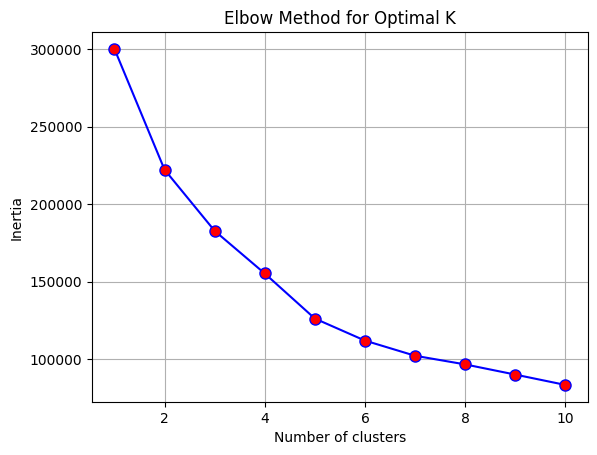

In [ ]:
# create list for assign the k or number of clusters
inertia = []

for k in range (1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(LRFMC_model_scaled)
  inertia.append(kmeans.inertia_)

# visualize the plot
plt.plot(range(1,11), inertia, marker='o', color='blue', markerfacecolor='red', markersize=8)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

Berdasarkan hasil grafik ini, nilai yang optimal dapat dilihat dari penurunan yang tidak terlalu besar lagi atau titik "siku" yang menggambarkan penambahan kluster baru tidak tidak lagi memberikan penurunan inertia (sum of square distance) yang signikan.

Nilai k optimal yang mungkin bisa diipilih berad di range 2-5. Untuk memastikan, kita akan mencari silhouette score paling tinggi di antara kluster (1-10) sebagai berikut

In [ ]:
# # create sample size
# np.random.seed(42)

# frac_sample = 0.2
# sample_size = int(len(LRFMC_model_scaled) * frac_sample)

# # random choices ny sample size
# random_indices = np.random.choice(len(LRFMC_model_scaled), size=sample_size, replace=False)

# # use the index to chose
# sample_LRFMC_model_scaled = LRFMC_model_scaled[random_indices]

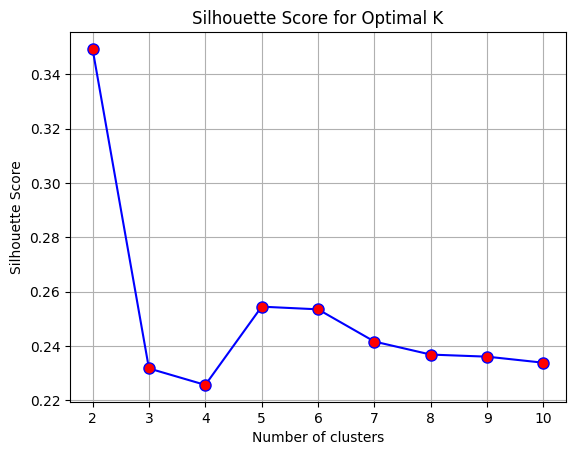

In [ ]:
# create list to store score
ss = []

for k in range(2,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(LRFMC_model_scaled)
  ss.append(silhouette_score(LRFMC_model_scaled, labels))

plt.plot(range(2,11), ss, marker='o', color='blue', markerfacecolor='red', markersize=8)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.grid(True)
plt.show()

Sebelumnya dengan Elbow Method titik siku atau kluster di mana penambahannya tidak memberikan penurunan inertia yang signifikan berada di rentag 2-5. Dengan score ini, cluser = 2 memberikan score paling tinggi kemudian disusul dengan cluster = 5.

Hasil ini tentu perlu diperhatikan karena Silhouette Score paling tinggi hanya di angka 0.34 yang mana ini kurang dari 60-70%. Pemilihan kluster bisa dipilih antara dua nilai kluster tersebut, namun perlu *disclaimer* terkait score ini.

### Fit with Data Without Outlier (Min-Max Scaling)

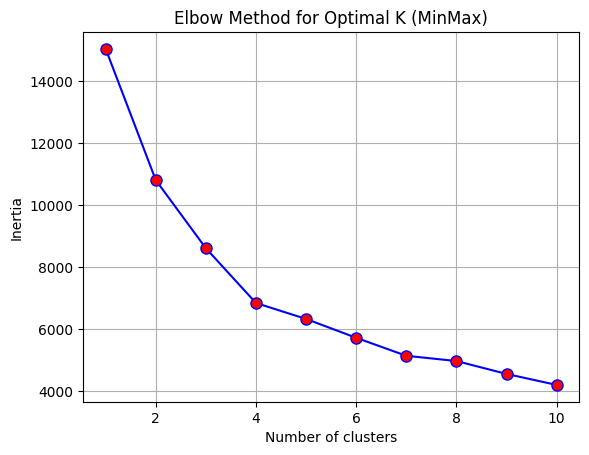

In [ ]:
# create list for assign the k or number of clusters
inertia = []

for k in range (1, 11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(LRFMC_model_scaled_minmax)
  inertia.append(kmeans.inertia_)

# visualize the plot
plt.plot(range(1,11), inertia, marker='o', color='blue', markerfacecolor='red', markersize=8)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K (MinMax)')
plt.grid(True)
plt.show()

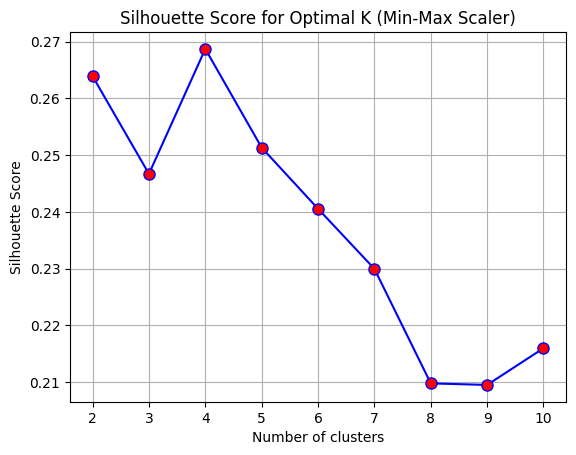

In [ ]:
# create list to store score
ss_minmax = []

for k in range(2,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  labels = kmeans.fit_predict(LRFMC_model_scaled_minmax)
  ss_minmax.append(silhouette_score(LRFMC_model_scaled_minmax, labels))

plt.plot(range(2,11), ss_minmax, marker='o', color='blue', markerfacecolor='red', markersize=8)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K (Min-Max Scaler)')
plt.grid(True)
plt.show()

Hasil Elbow Method dengan data outlier yang sudah dihapus kemudian di-*scale* menggunakan minx-max memberikan hasil yang tidak jauh berbeda dengan data yang di-*scale* menggunakan metode standarize. K yang mungkin optimal juga berada di rentang 2-5.

Namun hasil silhouette score terlihat memberikan nilai yang relatif berbeda, di mana K = 4 adalah yang tertinggi kemudian skor tertinggi kedua dimiliki oleh k = 2. Hal yang perlu menjadi perhatian adalah, silhouette score tidak meningkatkan secara drastis meskipun outlier berdasarkan IQR telah dihapus. Ini menjadi catatan saat kita mencoba menggunakan saat clustering dengan k = 4.

### Keputusan Pemilihan K (Cluster)

Hasil dengan standarize atau normalize memberikan hasil yang sedikit berbeda, utamanya di silhouette score. Hal yang perlu digaris bawahi pemilihan kluster sangat ketergantungan dengan interpretasi bisnis dan bagaimana relevansinya terhadap tujuan bisnis itu sendiri.

Tujuan bisnis tentu dalam konteks ini adalah menghasilkan cluster, namun real-case dalam hal ini, data yang didapatkan adalah berupa latihan atau mungkin bukan kondisi sesungguhnya. Dalam kasus ini, rujukan selain stakeholders bisnis yang saat ini belum ada, saya bisa menggunakan hasil dari paper atau method yang digunakan sebelumnya yakni hasil penelitian dari Saixin Wu (2022). Saixin Wu (2022) menggunakan K = 5.

Pada elbow method, K yang optimal bisa dipilih berada di range 2-5, sehingga penentuan lainnya adalah Silhouette Score. Silhouette score dengan data outlier, k=2 memberikan score paling tinggi di antara yang lainnya, yakni sekitar 0.35. Sementara itu, K=5 merupakan score paling tinggi kedua dengan skor sekitar 0,26. Adapunm silhouette score dengan data yang dihapus outlier statstik (by IQR), K=4 adalah skor tertinggi di angka sekitar 0.27 sedangkan skor tetinggi kedua adalah K=2 yang mendapatkan skor sekitar 0.26.

Pemilihan kluster balik lagi soal tujuan bisnis. Dua kluster (K=2) terlihat telalu sedikit, selain itu nilai silhoute pada k=2 ini juga kurang dari 0.5 bahkan. Maka dari itu, keputusan pemilihan K saya coba ambil berdasarkan data yang tidak membuang outlier berdasarkan statistik (dengam IQR), di mana **K=5** akan saya tetap pilih sebagai K yang akan di *cluster*-kan
1. Sesuai rujukan dengan hasil riset dari Saixin Wu (2022).
2. Skor antara K=4 di data yang membuat outlier (sekitar 0.27) tidak jauh berbeda dengan K=5 yang skor sekitar 0.26, peningkatan Silhouette Score tidak terlalu signifikan.

## Modelling wiht K-Means

Recap:
* K yang dipilih = 5
* Menggunakan data yang hana memebuang data yang tidak masuk akal (avg_discount > 1), sementara outlier yang diidentifikasi IQR tetap dipertahankan
* Menggunakan data LRFMC_model yang di-*scale* menggunakan standarisasi karena mempertahankan outlier pada data.

In [ ]:
# Fit Kmeans with K =5
# Fit kmeans clustering berdasarkan jumlah cluster yang dipilih
kmeans = KMeans(n_clusters=5, random_state=42)
LRFMC_model['Cluster'] = kmeans.fit_predict(LRFMC_model_scaled)

# masukkan hasil cluster sebagai kolom pada dataframe/dataset
LRFMC_model.head()

,member_no,Length,Recency,Frequency,Monetary,Discount_coefficient,Cluster
0,54993,2706,1,210,580717,0.961639,2
4,39546,1816,5,152,309928,0.970658,2
5,56972,2241,79,92,294585,0.967692,2
6,44924,2931,1,101,287042,0.965347,2
7,22631,1452,3,73,287230,0.962070,2


In [ ]:
LRFMC_model.sort_values(by='Monetary', ascending=False)

,member_no,Length,Recency,Frequency,Monetary,Discount_coefficient,Cluster
0,54993,2706,1,210,580717,0.961639,2
9,31645,1365,15,64,375074,0.708010,2
19,41616,945,24,38,332896,0.708285,2
12,28012,2685,67,29,321529,0.799127,2
8,32197,1028,6,56,321489,0.828478,2
...,...,...,...,...,...,...,...
62926,21412,2121,466,2,368,1.000000,4
62965,57428,1942,418,2,368,0.750000,4
62966,60676,627,412,2,368,0.750000,4
62937,50080,984,275,2,368,0.920000,4


## Visualize the Result of Cluster

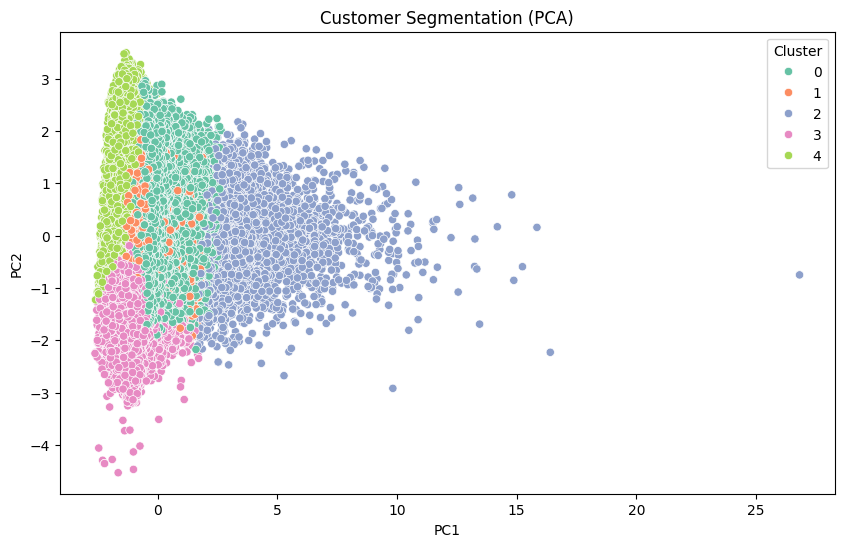

In [ ]:
# visualize with PCA
pca = PCA(n_components=2)
components = pca.fit_transform(LRFMC_model_scaled)

LRFMC_model['PC1'] = components[:, 0]
LRFMC_model['PC2'] = components[:, 1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=LRFMC_model, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('Customer Segmentation (PCA)')
plt.show()

Visualiasi 3D dengan `Axes3D` hanya akan menerima 3 koordinat yang dengan kata lain hanya menerima 3 variabel/fitur. Maka dari itu, Recency, Frequency, dan Monetary yang dipilih untuk divisualakn secara 3 dimensi

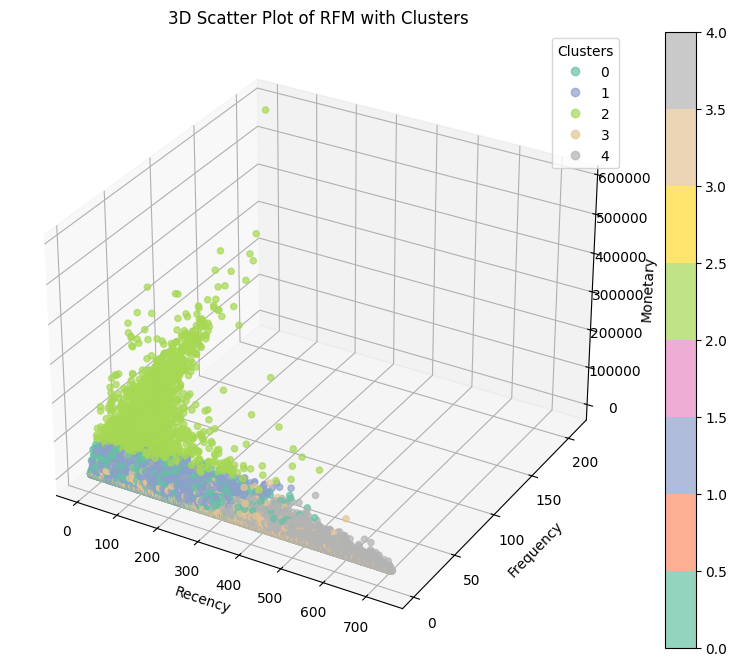

In [ ]:
# Visualisasi 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
                     LRFMC_model['Recency'],
                     LRFMC_model['Frequency'],
                     LRFMC_model['Monetary'],
                     c=LRFMC_model['Cluster'],
                     cmap='Set2',
                     s=20,
                     alpha=0.7)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('3D Scatter Plot of RFM with Clusters')

# Add a color bar
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
plt.colorbar(scatter)

plt.show()

Sejauh ini dari hasil visualisasi dengan 2D ataupun 3D, cluster kedua (2) merupakan yang terbaik dilihat dari segi recency paling rendah, frequency dan monetary lebih tinggi dibandingkan yang kluster yang lainnya.

Selain itu, visualisasi ini juga menunjukkan bagaimana ada beberapa titik di masing-masing kluster yang tumpah tindih, ini merupakan salah satu asalan mengapa Silhouette Score baik yang mempertahankan outlier IQR ataupun yang membuangnya, tetap memiliki skor yang di bawah 0.4. Untuk analisis dan intepretasi lebih lanjut kita akan melihat statistik deskriptif untuk masing-masing cluster.

## Evaluasi hasil atas clustering

In [ ]:
labels = LRFMC_model['Cluster']

# Calculate score in K = 5
final_silhouette_score = silhouette_score(LRFMC_model_scaled, labels)

# Print the result
print(f"Silhouette Score untuk K = 5 adalah: {final_silhouette_score:.4f}")

Silhouette Score untuk K = 5 adalah: 0.2545


Seperti yang dijelaskann sebelumnya, penggunaan K=5 untuk data yang masih mempertahankan outlier yang dideteksi IQR, meamng memiliki skor yang yang relatif rendah. K = 5, adalah nilai SIlhouette Score tertinggi kedua setelah K = 2 dengan score ~0.35. Alaasan pemilihan ini karena merujuk ke paper dan K = 2 terlalu sedikit untuk memberikan informasi yang bermakna dalam kluster antar grupnya. Visualiasi juga menguatkan alasan mengapa silhouette score rendah karena banyak titik yang tumpah tindih.

## Interpretasi & Rekomendasi

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

LRFMC_model.drop(columns=['member_no']).groupby('Cluster').describe().T

Cluster                                0             1              2  \
Length               count  14565.000000  19428.000000    4997.000000   
                     mean    2507.079300    922.577929    1890.896938   
                     std      442.178989    384.153348     844.011212   
                     min     1571.000000    365.000000     368.000000   
                     25%     2152.000000    588.000000    1149.000000   
                     50%     2472.000000    868.000000    1890.000000   
                     75%     2860.000000   1218.000000    2610.000000   
                     max     3437.000000   1914.000000    3437.000000   
Recency              count  14565.000000  19428.000000    4997.000000   
                     mean     104.497219     91.447087      28.072443   
                     std       97.440918     79.959932      42.922845   
                     min        1.000000      1.000000       1.000000   
                     25%       25.000000     23.000000       5.000000   
                     50%       76.000000     69.000000      13.000000   
                     75%      157.000000    144.000000      31.000000   
                     max      535.000000    423.000000     461.000000   
Frequency            count  14565.000000  19428.000000    4997.000000   
                     mean      10.871747     10.974470      46.395437   
                     std        7.573146      7.493713      20.416160   
                     min        2.000000      2.000000       7.000000   
                     25%        5.000000      5.000000      34.000000   
                     50%        9.000000      9.000000      41.000000   
                     75%       16.000000     15.000000      54.000000   
                     max       43.000000     44.000000     210.000000   
Monetary             count  14565.000000  19428.000000    4997.000000   
                     mean   15471.095846  15367.615092   66929.491295   
                     std    11054.084755  11134.736283   32388.475072   
                     min      368.000000    368.000000   17672.000000   
                     25%     6600.000000   6624.000000   47405.000000   
                     50%    12797.000000  12537.000000   58297.000000   
                     75%    22227.000000  21575.750000   76647.000000   
                     max    76142.000000  74784.000000  580717.000000   
Discount_coefficient count  14565.000000  19428.000000    4997.000000   
                     mean       0.712982      0.750118       0.739285   
                     std        0.116320      0.094211       0.096298   
                     min        0.307729      0.497937       0.381285   
                     25%        0.630097      0.679683       0.675632   
                     50%        0.709846      0.740155       0.737189   
                     75%        0.793504      0.813343       0.799645   
                     max        1.000000      1.000000       0.998555   
PC1                  count  14565.000000  19428.000000    4997.000000   
                     mean       0.384559      0.020981       3.561182   
                     std        0.748403      0.704081       1.713736   
                     min       -1.313795     -1.400031       1.182336   
                     25%       -0.200190     -0.522167       2.429761   
                     50%        0.246541     -0.113498       3.038775   
                     75%        0.892850      0.481280       4.158215   
                     max        2.646620      2.122957      26.822433   
PC2                  count  14565.000000  19428.000000    4997.000000   
                     mean       0.371709      0.022471      -0.074010   
                     std        0.774848      0.664097       0.695288   
                     min       -2.175393     -2.003581      -2.919030   
                     25%       -0.192682     -0.453271      -0.531226   
                     50%        0.332078     -0.029412    

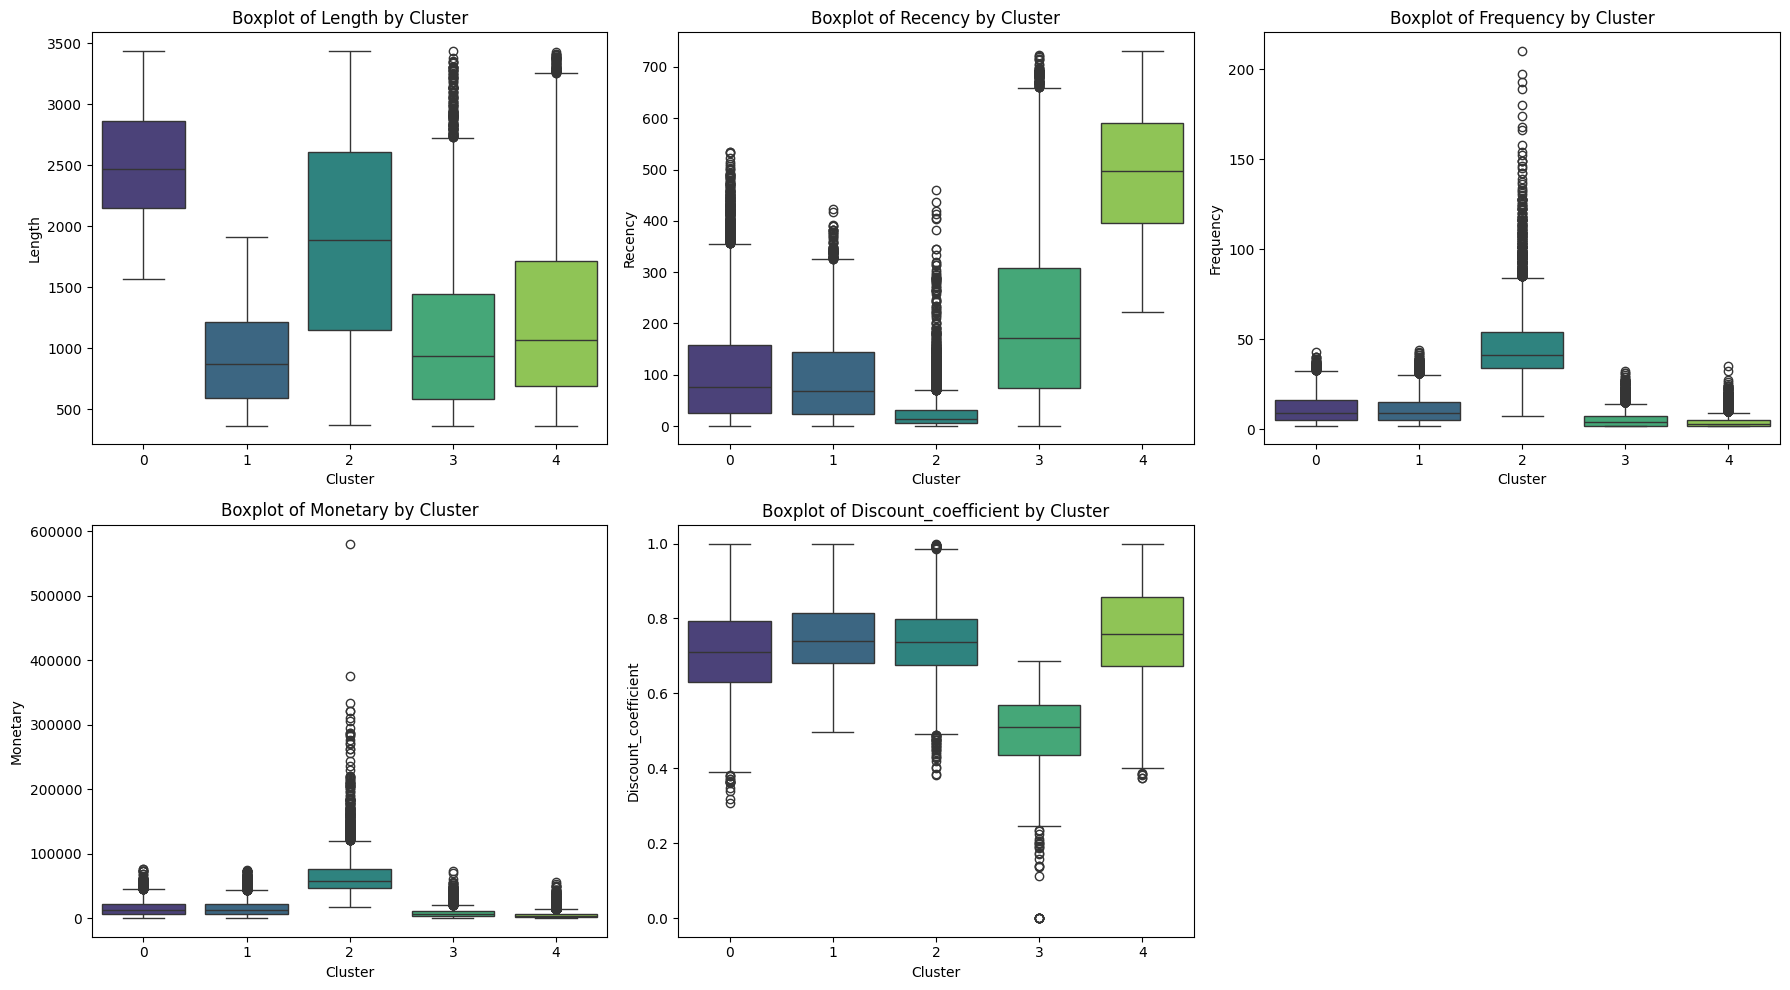

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# define col to plot and how many subplot
cols_to_plot = ['Length', 'Recency', 'Frequency', 'Monetary', 'Discount_coefficient']
n_cols = 3
n_plots = len(cols_to_plot)
n_rows = math.ceil(n_plots / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.flatten()

# Iteration every cols for every cluster
for i, col in enumerate(cols_to_plot):
    ax = axes[i]
    sns.boxplot(x='Cluster', y=col, data=LRFMC_model, ax=ax, palette='viridis')
    ax.set_title(f'Boxplot of {col} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(col)

# hiding the unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Berdasarkan hasil ini, kita mendapatkan pemahamab bahwa:
* `cluster 0`: Memiliki Length paling tinggi atau periode sebagai member paling tinggi atau lama di antara kluster yang lainnya (dilihat dari mediannya). Sementara untuk Recency, Frequency, Monetary, sampai Coefficient cluster hasilnya tidak berbeda jauh (signifikan) dengan cluster 1. Ini menandakan pola yang mirip di RFMC, namun berbeda dari segi lamanya sebagai member
* `cluster 1`: Konsumen yang ada dalam kluster ini memiliki periode sebagai member yang hampir mirip dengan kluster 3 dan 4. Sementara itu, untuk recency, mediannya tidak jauh berbeda dengan cluster 0 di sekitar ~90 hari. Demikian dengan jumlah penerbangan, total uang yang dikeluarkan, dan rata-rata diskon, kluster 1 dan 0 relatif mirip.
* `cluster 2`: Ini adalah kluster/grup yang terbaik berdasarkan LRFMC. Meskipun nilai Length atau periode sebagai member jauh lebih sedikit mediannya dari cluster 0, tetapi kluster ini memiliki Recency yang paling rendah, frequency paling tinggi, dan Monetary lebih banyak yang menjadi inti penilaian mengapa konsumen dalam kluster ini yang paling baik
* `cluster 3`: Ini adalah konsomen yang perlu diperhatikan karena dilihat dari Recency nya tinggi di angka sekitar ~200 hari. Sementara untuk, nilai frequnesi dan monetary yang dihasilkan sedikit lebih baik dibandingkan cluster setelah, yakni 4, di mana secara median cluster 3 menghasilkan Recency = 172, Frquency = 4, dan Monetary = 6076. Nilai ini semua lebih tinggi dibandingkan cluster 4
* `cluster 4`: Ini merupakan kluster yang berpotensi "hilang" atau tidak lagi menggunakan layanan karena secara metrik atau model LRFM, nilai paling rendah. Misalnya dalam soal Recency, dia yang paling lama di angka ~497 hari sedangkan untuk Monetary dan Frequency juga paling rendah secara statistik dibandingkan kluster lainnya.

Jika dikategorikan mungkin akan seperti ini
1. `Cluster 0`: Pelanggan Aktif Jangka Panjang

2. `Cluster 1`: Pelanggan Baru Berpotensi Tinggi

3. `Cluster 2`: Pelanggan VIP / Bernilai Tinggi

4. `Cluster 3`: Pelanggan Berisiko Hilang

5. `Cluster 4`: Pelanggan Tidak Aktif

Sebagai catatan: Silhoutte score yang dihasilkan dalam pemodelan ini cukup rendah, bahkan jika hanya mengikuti silhoutte score nilai paling tinggi ada di angka ~0.3 yang mana K hanya = 2. K = 5 adalah posisi kedua silhouette paling tinggi, alasan pemilihannya tadi karen K = 2 terlalu sedikit dan menyesuaikan rujukan paper. Jadi rekomendasi yang saya buat di bawah bersifat sementara atau masih ada ruang improvement di dalamnya. Rekoemndasi-rekomendasi adalah sebagai berikut

1. Memberikan penawaran atau promo kepada pelangagan yang yang aktif dan berpotensi tinggi. Untuk pelanggan baru berpotensi, ini berguna untuk meningkat loyalitas sehingga pelaggan terus menggunakan layanan atau program dari maskapai kita. Sementara untuk pelanggan aktif baru dengan periode member terpanjang, promo atau penawaran atas loyalitas bisa meningkatkan frekuensi penerbangan mereka atau meningkatkan jumlah miles mereka.
2. Untuk pelanggan yang tidak aktif dan berisiko, pihak divisi customer relationship atau research terkait pelanggan, bisa mengecek jika ada semacam penilaian yang diberikan. Jika ada, ini bisa diteliti terkait ulasan yang diberikan konsumen, jika ada hal yang bisa diimprove dan reliable dilakukan maka bisa diperbaiki sembari mencoba membangun hubungan lagi dengan pelanggan yang tidak aktif atau bersiko dengan promo ataupun promosi/keuntungan lainnya, seperti diskon tiket pesawat, penambahan manfaat dengan mendaftar member, promo untuk pelanggan yang kembali hadir/menggunakan layanan, dan lain sebagainya
3. Sementara itum untuk pelanggan VIP atau bernilai tinggi, treatment perlu dijaga dan terus ditingkat. Bahkan jika memungkinkan, perusahaan bisa melakukan "dengar pendapat" terkait hal yang perlu ditingkatkan atau hak yang diapresiasi oleh konsumen ini. Memberikan treatment, program atau layanan yang terbaik adalah suatu hal yang perlu dilakukan karena konsumen di kluster ini secara umum sering menggunakan layanan, baik secara jeda waktu atau frekuensi.

# Kesimpulan dan Keterbatasan (Ruang Improvement)

## Kesimpulan
* Model LRFMC yang digunakan adalah dengan tetap memprtahankan outlier berdasarkan IQR yang masih masuk akal. Data yang dihapus hanya baris yang mengandung avg_discount > 1.0.
* Kemudian, skala yang digunakan model LRFMC adalah `Standarize` karena lebih tahan terhadap outlier dibandingkan `Normalize` yang menggunakan MinMax.
* Hasil elbow method dan silhoutte score diputuskan K yang diambil adalah K=5
* Hasil score silhoutte score masih relatif rendah
* Kluster 2 adalah kluster yang paling baik karena memberikan recency yang paling rendah, frequency dan monetary paling tinggi di antara kluster lainnya.


## Keterbatasan (Ruang Improvement)
* Metode masih menggunakan K-means clustering dan bisa dilihat kalo Silhouette score yang didapat masih rendah. Hal ini besar kemungkinan adanya titik-titik yang tumpah tindih sehingga kemurnian antar cluster kurang ter-separation dengan baik.
* Untuk ekpserimen selanjut bisa  meningkatkan score ini, bisa dengan mengganti model, meningkan data preprocessing atau feature engineering, menerapkan metode yang dirujuk oleh paper dengan pembobotan, ataupun langkah2 lainnya yang bisa meningkatkan score untuk menghasilkan kluster yang lebih baik